### Redes Neurais e Arquiteturas Profundas
#### **MBA em Ciências de Dados**

### *Módulo 2 - Redes Neurais Convolucionais (CNNs)*

**Parte 2 - Explorando alternativas para CNNs**

Moacir A. Ponti - ICMC/USP

-

Biblioteca utilizada - Keras com Tensorflow

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
# testando o uso de GPU
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [3]:
# carregando datasets do keras
#from tensorflow.keras.datasets import mnist

from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


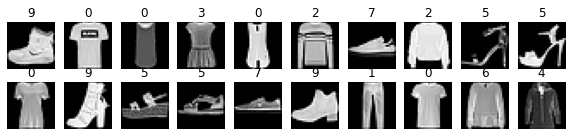

In [4]:
# visualizando 20 imagens do dataset
fig, axes = plt.subplots(2,10, figsize=(10,2))
ax = axes.ravel()
for i in range(20):
    ax[i].imshow(x_train[i], cmap="gray")
    ax[i].set_title("%d" % (y_train[i]))
    ax[i].axis('off')

In [5]:
# obtendo informações das imagens (resolucao) e dos rótulos (número de classes)
img_lin, img_col = x_train.shape[1], x_train.shape[2]
num_classes = len(np.unique(y_train))
print(x_train.shape)
print('Classes: ', num_classes)

(60000, 28, 28)
Classes:  10


Temos portando 60 mil exemplos de treinamento

Imagens de tamanho $28\times 28$ e 10 classes.

Agora, o passo ideal é pré-processar as imagens para facilitar o processo de otimização das redes neurais:

1. Normalizar seus valores (para o intervalo 0-1)
2. Alterar a codificação das classes (para one-hot-encoding): teremos 10 neurônios na saída, não apenas 1

In [6]:
# dividir por 255 para obter normalizacao
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

print("Antes da transformação: ", y_train[0])
# transformar categorias em one-hot-encoding
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print("Após transformação: ", y_train[0])

Antes da transformação:  9
Após transformação:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


Por fim, vamos padronizar o formato de entrada em termos das dimensões (shape) do numpy array de entrada.

Isso vai permitir que o mesmo código utilize diferentes bases de dados, com um ou mais canais de cor

In [7]:
# verifica imagens da base de dados tem 3 canais (RGB) ou apenas 1 (escala de cinza)
if (len(x_train.shape) == 3):
      n_channels = 1
else:
      n_channels = x_train.shape[3]

# re-formata o array de forma a encontrar o formato da entrada (input_shape)
# se a dimensão dos canais vem primeiro ou após a imagem
if keras.backend.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], n_channels, img_lin, img_col)
    x_test = x_test.reshape(x_test.shape[0], n_channels, img_lin, img_col)
    input_shape = (n_channels, img_lin, img_col)
else:
    x_train = x_train.reshape(x_train.shape[0], img_lin, img_col, n_channels)
    x_test = x_test.reshape(x_test.shape[0], img_lin, img_col, n_channels)
    input_shape = (img_lin, img_col, n_channels)

print("Shape: ", input_shape)

Shape:  (28, 28, 1)


### Tudo pronto, agora vamos começar

OBS: poderíamos ter feito mais etapas de pré-processamento aqui, como por exemplo normalização z-score das imagens, remoção de outliers, etc.

In [10]:
# a CNN que usamos no passo anterior
CNN1 = keras.Sequential()
CNN1.add(keras.layers.Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=input_shape))
CNN1.add(keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
CNN1.add(keras.layers.Conv2D(64, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu'))
CNN1.add(keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
CNN1.add(keras.layers.Conv2D(64, kernel_size=(3,3), strides=(1,1),  padding='same', activation='relu'))
CNN1.add(keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
CNN1.add(keras.layers.Flatten())
CNN1.add(keras.layers.Dense(64, activation='relu'))
CNN1.add(keras.layers.Dense(10, activation='softmax'))
CNN1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 5, 5, 64)          36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 256)              

In [11]:
# Algumas alternativas: uso de stride ao invés de MaxPooling e uso de tamanhos de filtro diferentes: ao inves de 3x3, usamos 1x3, 3x1 e 1x1
CNN2 = keras.Sequential()
CNN2.add(keras.layers.Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=input_shape))
CNN2.add(keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
CNN2.add(keras.layers.Conv2D(64, kernel_size=(3,3), strides=(2,2), padding='valid', activation='relu'))
CNN2.add(keras.layers.Conv2D(64, kernel_size=(3,3), strides=(3,3), padding='same', activation='relu'))
CNN2.add(keras.layers.Flatten())
CNN2.add(keras.layers.Dense(64, activation='relu'))
CNN2.add(keras.layers.Dense(10, activation='softmax'))
CNN2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 6, 6, 64)          18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 2, 2, 64)          36928     
_________________________________________________________________
flatten_3 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

In [12]:
# Algumas alternativas: uso de stride ao invés de MaxPooling e uso de tamanhos de filtro diferentes: ao inves de 3x3, usamos 1x3, 3x1 e 1x1
CNN3 = keras.Sequential()
CNN3.add(keras.layers.Conv2D(64, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=input_shape))
CNN3.add(keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
CNN3.add(keras.layers.Conv2D(64, kernel_size=(1,3), strides=(1,1), padding='valid', activation='relu'))
CNN3.add(keras.layers.Conv2D(64, kernel_size=(3,1), strides=(1,1), padding='valid', activation='relu'))
CNN3.add(keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
CNN3.add(keras.layers.Conv2D(64, kernel_size=(1,3), strides=(1,3),  padding='same', activation='relu'))
CNN3.add(keras.layers.Conv2D(64, kernel_size=(3,1), strides=(3,1),  padding='same', activation='relu'))
CNN3.add(keras.layers.Flatten())
CNN3.add(keras.layers.Dense(64, activation='relu'))
CNN3.add(keras.layers.Dense(10, activation='softmax'))
CNN3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 13, 11, 64)        12352     
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 11, 11, 64)        12352     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 5, 2, 64)          12352     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 2, 2, 64)         

### 1) Compilando os modelos

In [13]:
# as sementes ajudam a ter resultados reproduzíveis
from numpy.random import seed
seed(1)
from tensorflow.random import set_seed
set_seed(2)

CNN1.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.SGD(lr=0.05),
              metrics=['accuracy'])

CNN2.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.SGD(lr=0.05),
              metrics=['accuracy'])

CNN3.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.SGD(lr=0.05),
              metrics=['accuracy'])

# vamos usar o mesmo número de épocas e batchsize para ambos
batch_size = 64
epochs = 8

## 2) Executando o treinamento

In [14]:
hist1 = CNN1.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs, verbose=0)

score1_Tr = CNN1.evaluate(x_train, y_train, verbose = 0)
score1_Te = CNN1.evaluate(x_test, y_test, verbose = 0)

In [15]:
hist2 = CNN2.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs, 
                    verbose=0)

score2_Tr = CNN2.evaluate(x_train, y_train, verbose = 0)
score2_Te = CNN2.evaluate(x_test, y_test, verbose = 0)

In [16]:
hist3 = CNN3.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs, 
                    verbose=0)

score3_Tr = CNN3.evaluate(x_train, y_train, verbose = 0)
score3_Te = CNN3.evaluate(x_test, y_test, verbose = 0)

In [17]:
print("CNN 1 Acurácia treinamento: %.4f" % (score1_Tr[1]))
print("CNN 1 Acurácia teste: %.4f" % (score1_Te[1]))

print("CNN 2 Acurácia treinamento: %.4f" % (score2_Tr[1]))
print("CNN 2 Acurácia teste: %.4f" % (score2_Te[1]))

print("CNN 3 Acurácia treinamento: %.4f" % (score3_Tr[1]))
print("CNN 3 Acurácia teste: %.4f" % (score3_Te[1]))

CNN 1 Acurácia treinamento: 0.8984
CNN 1 Acurácia teste: 0.8827
CNN 2 Acurácia treinamento: 0.8981
CNN 2 Acurácia teste: 0.8815
CNN 3 Acurácia treinamento: 0.8881
CNN 3 Acurácia teste: 0.8737


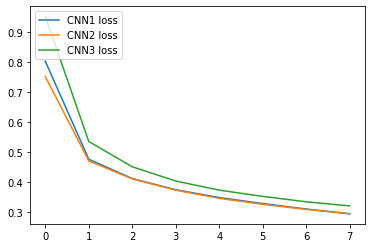

In [18]:
plt.plot(hist1.history['loss'])
plt.plot(hist2.history['loss'])
plt.plot(hist3.history['loss'])
plt.legend(["CNN1 loss", "CNN2 loss", "CNN3 loss"], loc="upper left")